In [1]:
# Import packages

import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
from earthpy.plot import es
import seaborn as sns
from matplotlib import patches as mpatches, colors
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from shapely.geometry import Point,mapping,box
import rasterio as rio
import rasterstats as rs
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.mask import mask
import earthpy.mask as em
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pyproj import Proj, transform
from glob import glob

import warnings
warnings.filterwarnings('ignore')

# Get data and set working directory
# data = et.data.get_data('spatial-vector-lidar')
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# Downloading from https://ndownloader.figshare.com/files/12459464 
# Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

In [2]:
logging_road_shape = "./data/geometry/osm_logging_roads/osm_logging_roads.shp"

logging_locations = gpd.read_file(logging_road_shape)

In [6]:
logging_locations.describe()

,st_length_
count,260826.000000
mean,1322.042167
std,4344.415453
min,0.003701
25%,110.449529
50%,286.723247
75%,861.411179
max,221827.595018


In [15]:
logging_locations.head()

,osm_id,access,bridge,end_date,ferry,ford,highway,informal,maxspeed,name,...,seasonal,smoothness,source,start_date,surface,trail_visi,tunnel,width,st_length_,geometry
0,410232482,None,None,None,None,None,path,None,None,None,...,None,None,None,None,None,None,None,None,52.126344,"LINESTRING (2429282.022 767645.622, 2429254.84..."
1,410056961,None,None,None,None,None,path,None,None,None,...,None,None,None,None,None,None,None,None,847.180207,"LINESTRING (2422028.945 771377.947, 2422044.16..."
2,410083224,None,None,None,None,None,path,None,None,None,...,None,None,None,None,None,None,None,None,199.314437,"LINESTRING (2427727.245 770202.195, 2427722.99..."
3,410083243,None,None,None,None,None,path,None,None,None,...,None,None,None,None,None,None,None,None,166.946792,"LINESTRING (2428646.154 771393.893, 2428653.35..."
4,410232463,None,None,None,None,None,path,None,None,None,...,None,None,None,None,None,None,None,None,237.446886,"LINESTRING (2429549.757 767994.191, 2429558.61..."


In [7]:
logging_locations.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

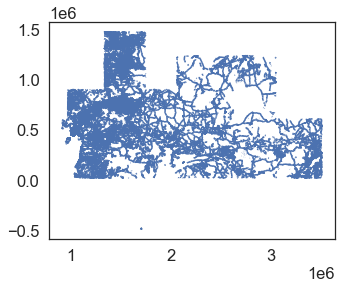

In [9]:
logging_locations.plot()

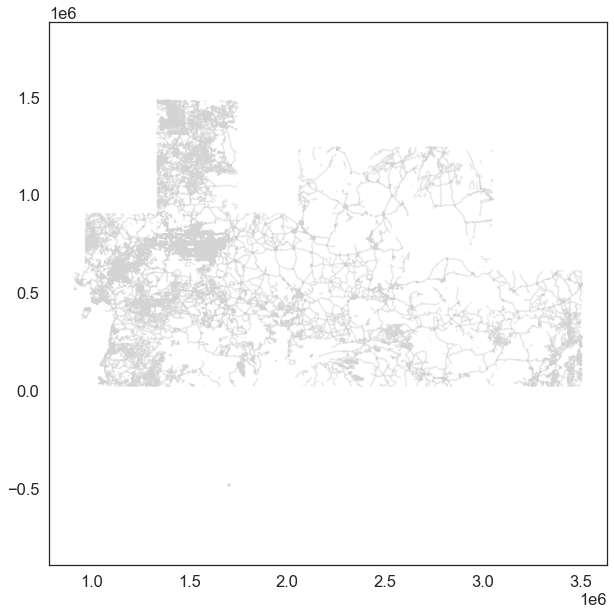

In [10]:
# Import crop boundary
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
logging_locations.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

plt.axis('equal')
plt.show()

In [12]:
!pwd

/Users/purgatorid/Documents/GitHub/canopy-gis/data_collection


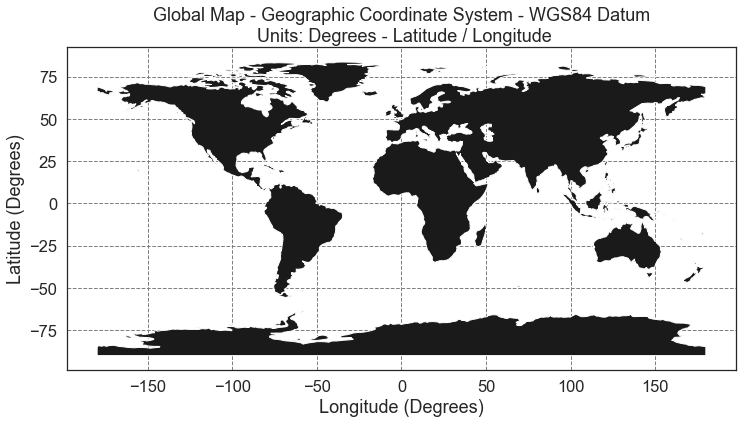

In [14]:
worldBound_path = "/Users/purgatorid/Documents/GitHub/canopy-gis/EarthDS-intro/data/spatial-vector-lidar/global/ne_110m_land/ne_110m_land.shp"

worldBound = gpd.read_file(worldBound_path)

# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# # Add city locations
# logging_locations.plot(ax=ax, 
#                     color='springgreen', 
#                     alpha = .5,
#                     markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

# Loading Fritz Dataset

In [3]:
logging_road_shape = "./data/geometry/fritz_roads/test3/test3.shp"

logging_locations = gpd.read_file(logging_road_shape)

In [4]:
logging_locations.describe()

,osm_id,end_date,st_length_,index_righ,concession,length
count,1.277500e+04,2.0,12775.000000,12775.000000,12775.0,12775.000000
mean,3.499633e+08,2008.0,6982.387090,117465.924618,1.0,2343.323209
std,6.449961e+07,0.0,9297.186590,20489.813499,0.0,2274.810716
min,3.359103e+07,2008.0,35.552755,90013.000000,1.0,2.000000
25%,3.383620e+08,2008.0,2045.828782,99042.000000,1.0,1095.000000
50%,3.509737e+08,2008.0,4221.090153,112425.000000,1.0,1675.000000
75%,3.741892e+08,2008.0,8310.637709,133348.000000,1.0,2822.500000
max,4.385910e+08,2008.0,88573.818982,203670.000000,1.0,47144.000000


In [8]:
logging_locations["highway"]

0        track
1        track
2        track
3        track
4        track
         ...  
12770    track
12771    track
12772    track
12773    track
12774    track
Name: highway, Length: 12775, dtype: object